In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset= pd.read_csv("C:/Users/JAI KALYAN/Desktop/Tata steel.csv")

In [9]:
dataset.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


In [10]:
dataset.shape

(1485, 13)

In [11]:
dataset.drop('Deliverable Quantity' , axis =1, inplace=True)

In [12]:
dataset.drop('% Deli. Qty to Traded Qty' , axis =1, inplace=True)

In [13]:
dataset.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,7.65,-4.65


In [17]:
dataset.isna().any()

Open Price              False
High Price              False
Low Price               False
Close Price             False
WAP                     False
No.of Shares            False
No. of Trades           False
Total Turnover (Rs.)    False
Spread High-Low         False
Spread Close-Open       False
dtype: bool

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open Price            1485 non-null   float64
 1   High Price            1485 non-null   float64
 2   Low Price             1485 non-null   float64
 3   Close Price           1485 non-null   float64
 4   WAP                   1485 non-null   float64
 5   No.of Shares          1485 non-null   int64  
 6   No. of Trades         1485 non-null   int64  
 7   Total Turnover (Rs.)  1485 non-null   int64  
 8   Spread High-Low       1485 non-null   float64
 9   Spread Close-Open     1485 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 116.1 KB


In [19]:
dataset.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Spread High-Low,Spread Close-Open
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1.485000e+03,1485.000000,1485.000000
mean,486.573131,494.064949,478.727879,486.225926,486.568546,7.976508e+05,10493.148148,3.715847e+08,15.337071,-0.347205
std,187.045761,189.642821,184.183050,187.008913,187.008966,4.887324e+05,6684.557776,2.946512e+08,9.853676,10.852069
min,205.050000,206.250000,200.000000,201.350000,202.938799,5.497700e+04,1000.000000,2.522744e+07,1.800000,-56.900000
25%,355.650000,360.550000,346.700000,354.250000,354.529229,4.726870e+05,6231.000000,2.148535e+08,9.100000,-6.300000
50%,470.550000,477.000000,463.350000,469.550000,469.528425,6.804740e+05,8790.000000,2.911989e+08,12.750000,-0.500000
75%,581.000000,587.500000,572.100000,579.800000,580.223152,9.814850e+05,12930.000000,4.212425e+08,18.350000,4.950000
max,1231.000000,1246.800000,1200.000000,1233.900000,1215.986040,5.089559e+06,63054.000000,3.514542e+09,88.450000,53.350000


In [20]:
print(len(dataset))

1485


<Axes: >

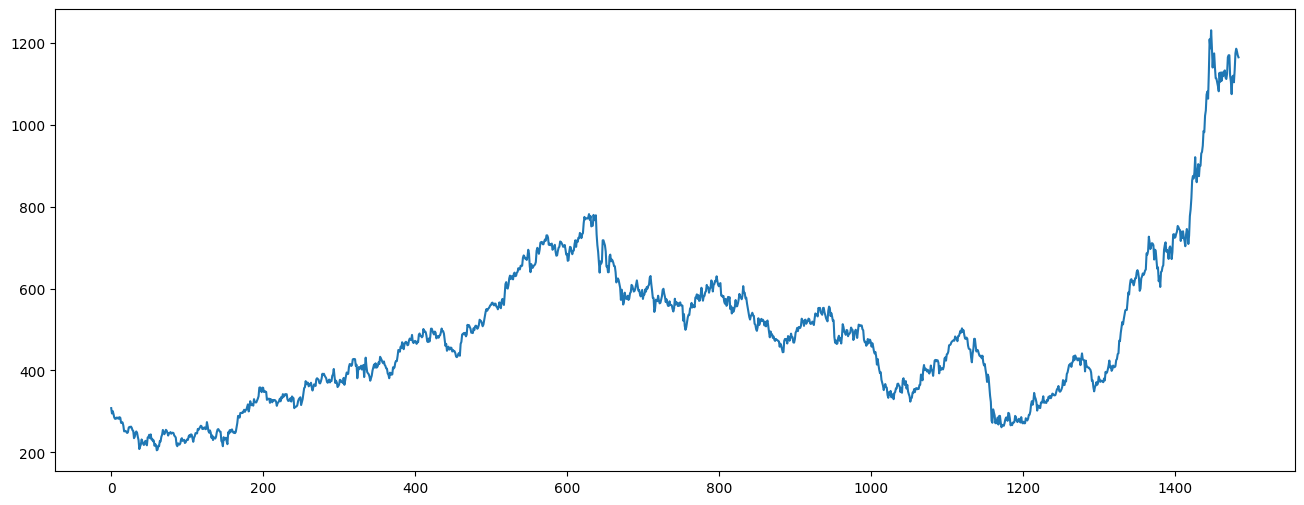

In [21]:
dataset['Open Price'].plot(figsize=(16,6))

<Axes: >

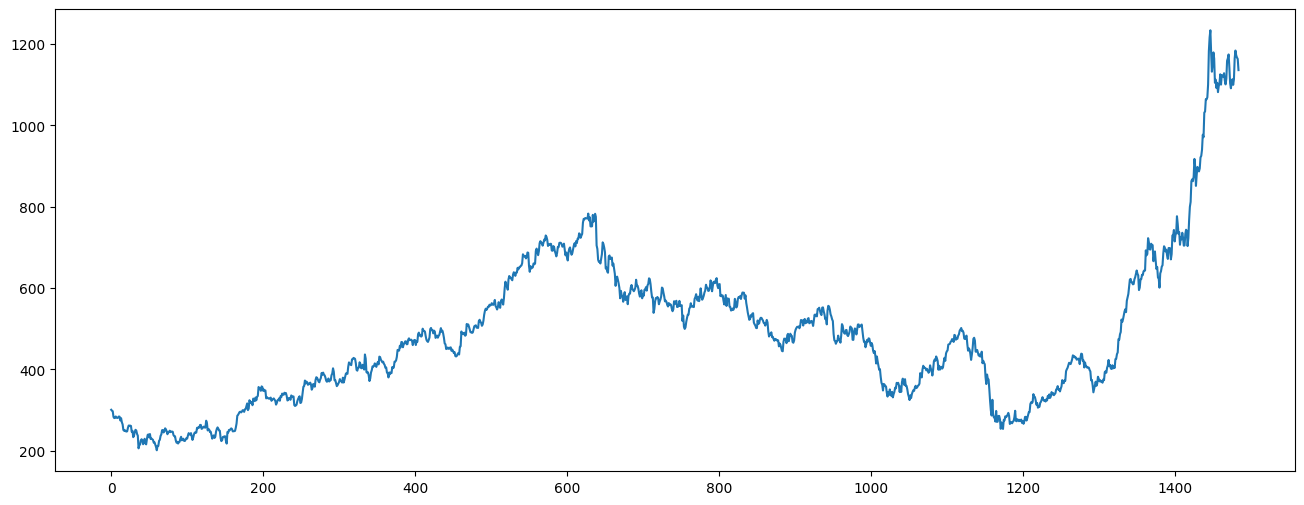

In [22]:
dataset['Close Price'].plot(figsize=(16,6))

In [48]:
corr = dataset.corr()
corr

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999209,0.999160,0.998317,0.999130,-0.189425,0.100161,0.451173,0.554567,-0.032404
High Price,0.999209,1.000000,0.999037,0.999407,0.999735,-0.171229,0.119426,0.469412,0.572088,0.000010
Low Price,0.999160,0.999037,1.000000,0.999231,0.999648,-0.196524,0.090046,0.444301,0.535547,-0.002177
Close Price,0.998317,0.999407,0.999231,1.000000,0.999697,-0.177005,0.111254,0.463785,0.557048,0.025619
WAP,0.999130,0.999735,0.999648,0.999697,1.000000,-0.180949,0.107518,0.459906,0.555579,0.006389
No.of Shares,-0.189425,-0.171229,-0.196524,-0.177005,-0.180949,1.000000,0.834895,0.715627,0.377918,0.214665
No. of Trades,0.100161,0.119426,0.090046,0.111254,0.107518,0.834895,1.000000,0.824524,0.615331,0.190821
Total Turnover (Rs.),0.451173,0.469412,0.444301,0.463785,0.459906,0.715627,0.824524,1.000000,0.729460,0.215808
Spread High-Low,0.554567,0.572088,0.535547,0.557048,0.555579,0.377918,0.615331,0.729460,1.000000,0.040874
Spread Close-Open,-0.032404,0.000010,-0.002177,0.025619,0.006389,0.214665,0.190821,0.215808,0.040874,1.000000


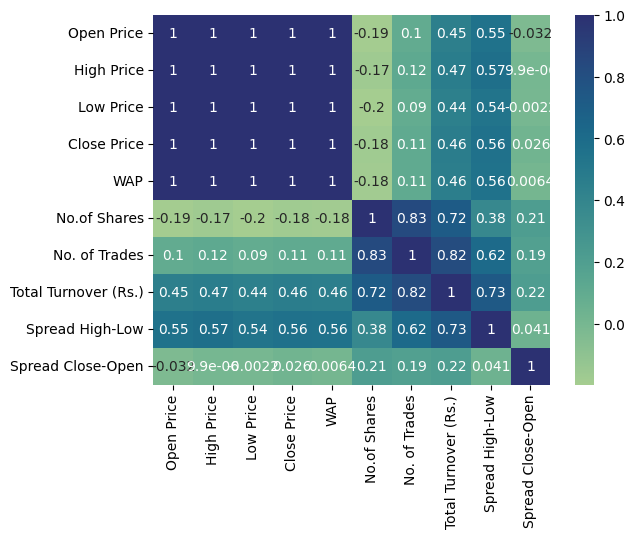

In [85]:
corr = dataset.corr()
sns.heatmap(corr, cmap = 'crest', annot= True);

In [23]:
x=dataset[['Open Price','High Price','Low Price','WAP','Total Turnover (Rs.)']]
y=dataset['Close Price']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [25]:
x_train.shape

(1113, 5)

In [26]:
x_test.shape

(372, 5)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [28]:
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
coefficent = print(regressor.coef_) 

[-4.12739110e-01  3.31693015e-01  2.50234840e-01  8.29371894e-01
  1.28185584e-09]


In [30]:
intercept = print(regressor.intercept_)

-0.6162104878318928


In [31]:
predicted=regressor.predict(x_train)

In [32]:
print(x_train)

      Open Price  High Price  Low Price         WAP  Total Turnover (Rs.)
898       468.50      476.75     464.60  471.256474             418763215
459       436.00      457.35     436.00  450.948439             669558772
618       732.50      735.70     721.20  730.599850             171071416
615       724.00      728.80     717.55  724.125545             160617563
1355      600.00      623.90     596.05  608.946287             253391684
...          ...         ...        ...         ...                   ...
763       553.90      564.50     543.40  553.838289             273243320
835       576.20      583.50     574.45  580.455004             164451029
1216      335.50      343.95     329.00  337.348913             249764364
559       664.90      693.90     664.05  685.131819             431524110
684       591.35      603.90     591.35  599.024277             366907761

[1113 rows x 5 columns]


In [33]:
predicted=regressor.predict(x_test)

In [34]:
print(x_test)

      Open Price  High Price  Low Price          WAP  Total Turnover (Rs.)
9         285.00      286.75     280.60   282.752620             263677846
342       381.00      394.00     380.50   387.922620             286189913
567       714.00      717.90     707.10   710.908515             153830650
1447     1187.00     1246.25    1176.60  1215.986040            2635460047
1263      417.05      421.65     408.95   413.487145             311535687
...          ...         ...        ...          ...                   ...
1357      629.50      635.35     626.60   631.207304             231127285
482       501.90      506.70     499.80   503.867918             275551256
1261      413.50      427.50     412.50   421.135923             389877109
474       492.25      499.90     487.50   493.468751             238436205
1459     1127.10     1143.80    1097.55  1124.118520             990357409

[372 rows x 5 columns]


In [35]:
predicted.shape

(372,)

In [36]:
dfr=pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})

In [37]:
print(dfr)

      Actual Price  Predicted Price
9           281.50       281.927085
342         392.35       390.130565
567         709.35       709.556266
1447       1233.90      1229.144123
1263        413.25       412.776802
...            ...              ...
1357        632.80       630.904697
482         502.65       503.613360
1261        416.45       423.514867
474         491.20       493.590539
1459       1103.75      1121.803059

[372 rows x 2 columns]


In [38]:
dfr.head(20)

,Actual Price,Predicted Price
9,281.50,281.927085
342,392.35,390.130565
567,709.35,709.556266
1447,1233.90,1229.144123
1263,413.25,412.776802
553,648.35,646.146915
54,228.55,230.793345
1139,444.25,452.292091
610,710.30,707.587736
704,602.45,605.393917


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
regressor.score(x_test, y_test)

0.9995981228177993

In [41]:
import math

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 2.559859381657873


In [43]:
print('Mean Absolute Error:', metrics.mean_squared_error(y_test, predicted))

Mean Absolute Error: 13.131093078574064


In [44]:
print('root mean squared error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

root mean squared error: 3.623685013708292


In [45]:
graph=dfr.head(20)

<Axes: >

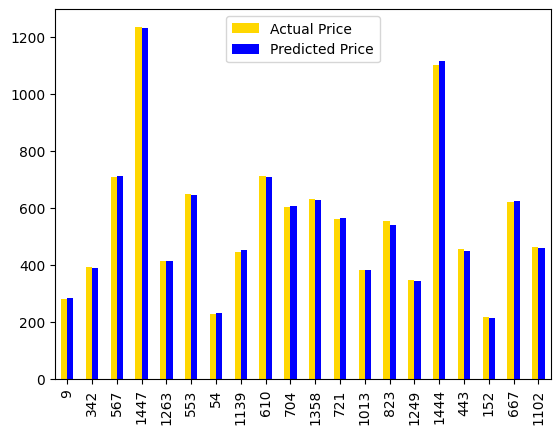

In [95]:
graph.plot(kind='bar', color=('gold','blue'))